In [69]:
import pandas as pd
import matplotlib.pyplot as plt

## (8)

### (a) データ読み込み

In [34]:
dataset_path = "./datasets/College.csv"
df = pd.read_csv(dataset_path, index_col=0)

In [35]:
df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


### (c) i. データの要約

In [36]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### (c) ii. 散布図行列の表示

[note.nkmk.me](https://note.nkmk.me/python-seaborn-pandas-pairplot/) を参考

In [15]:
import seaborn as sns

/home/nariaki/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
# 注意! スライスは使えない
# df.iloc[:, [1:10]]

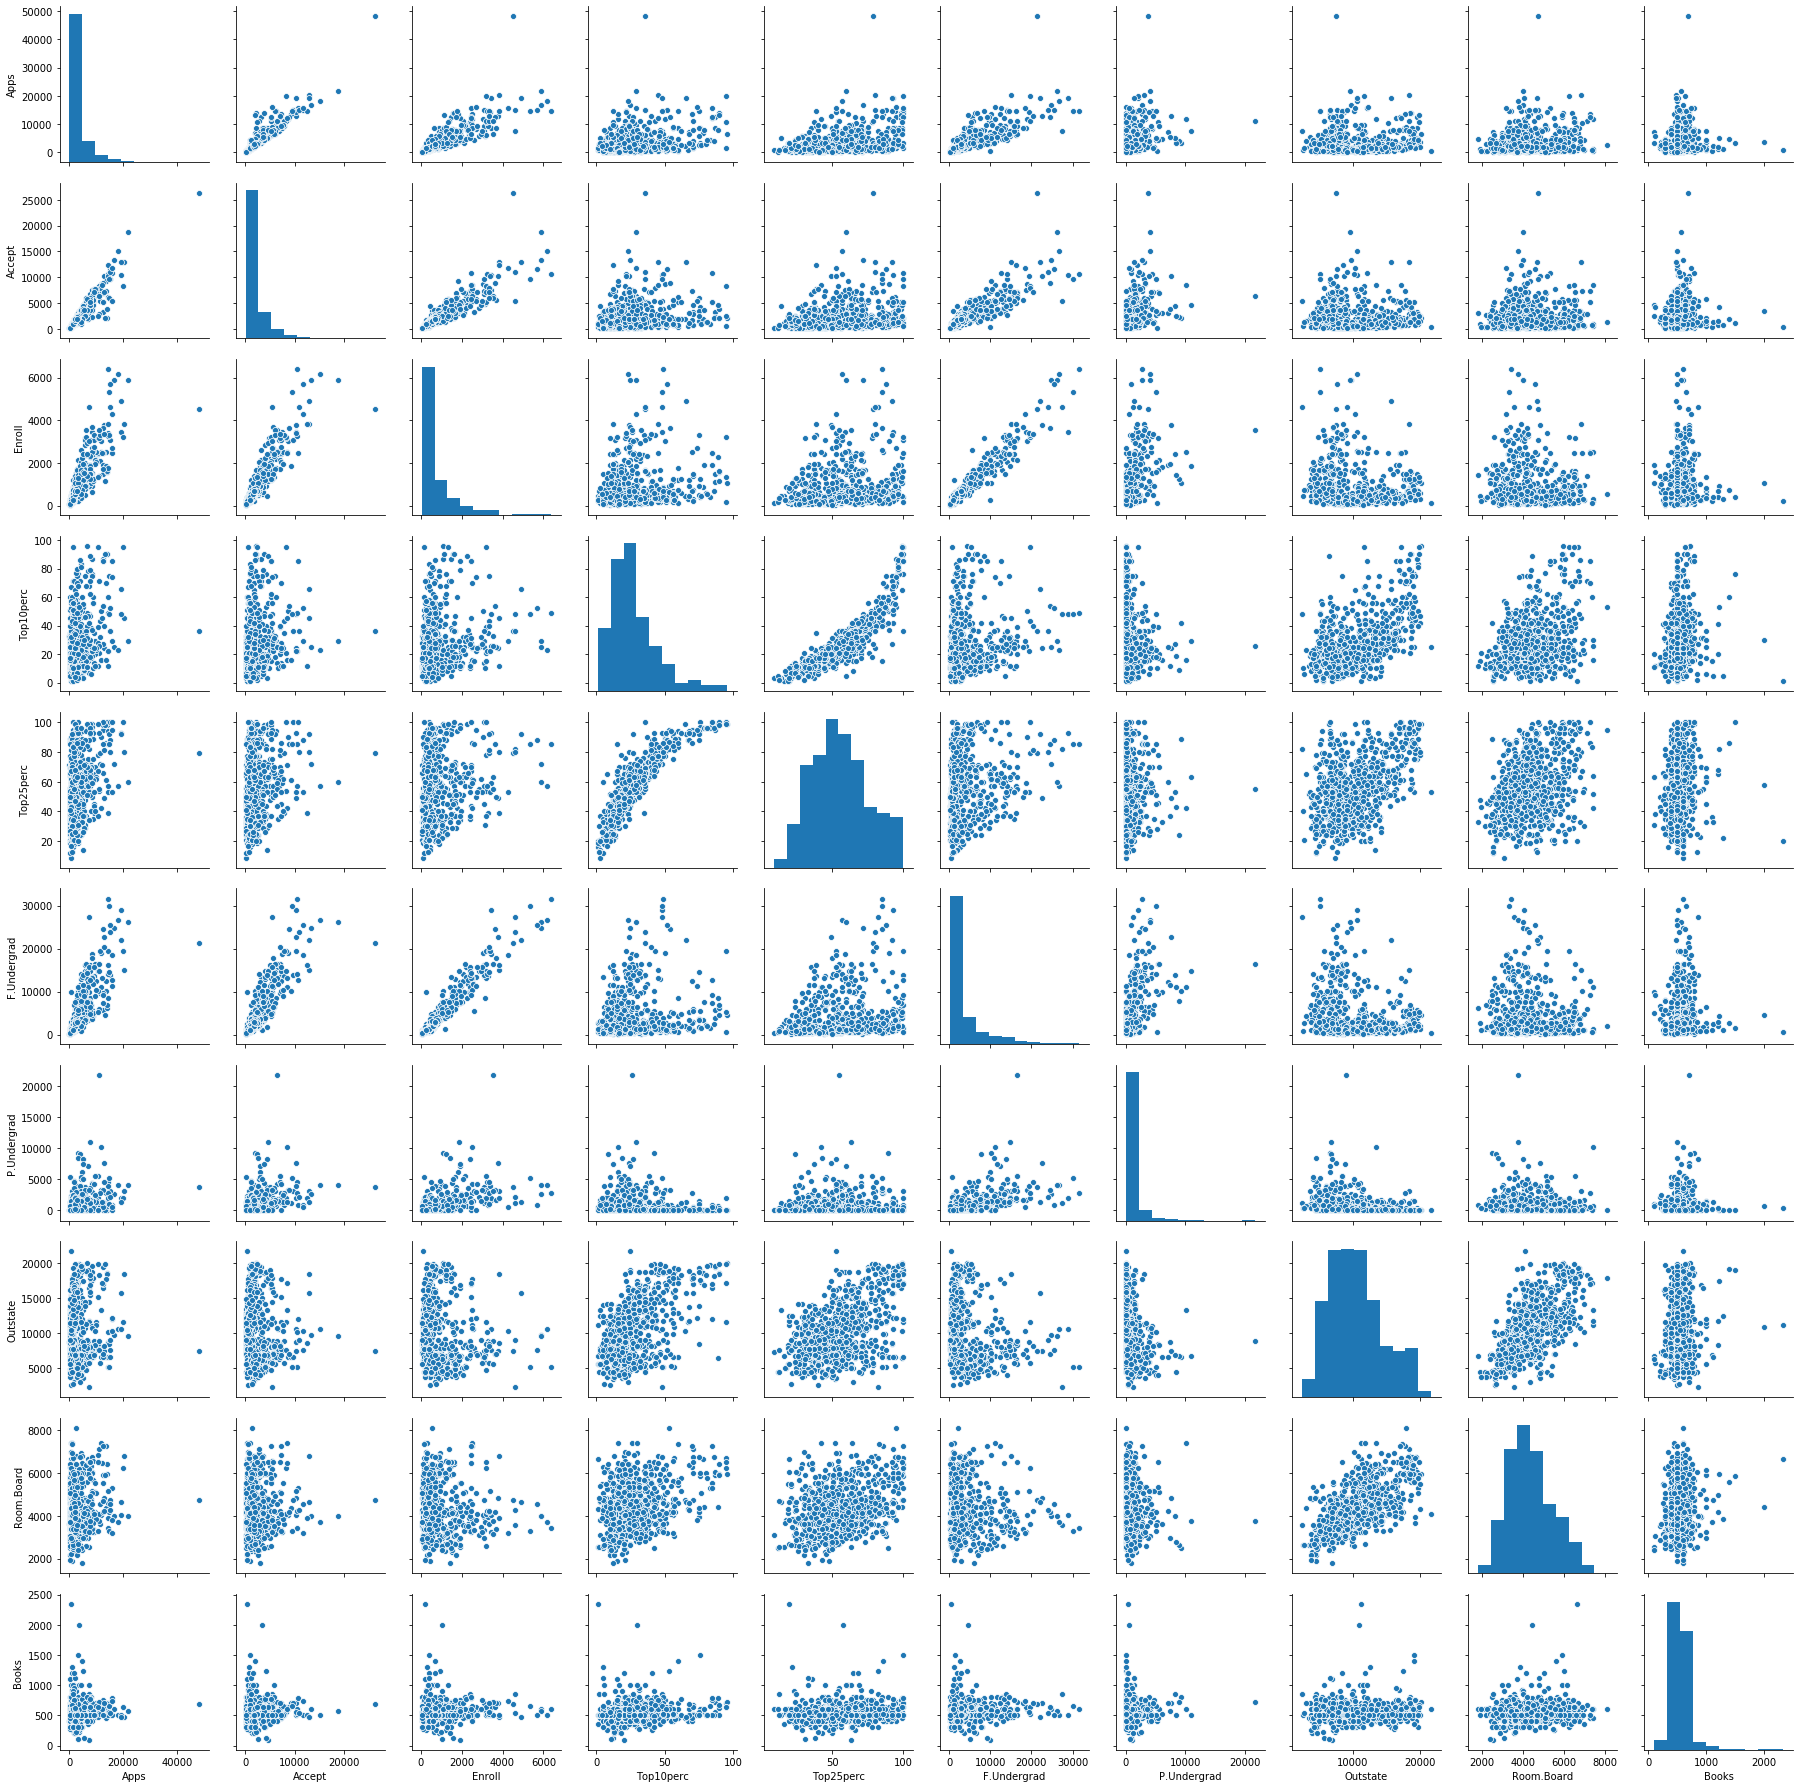

In [39]:
pg = sns.pairplot(df.columns[1:11].values)
# 下の書き方はいけてない
# pg = sns.pairplot(df.iloc[:, [i for i in range(1, 11)]])

### (c) iii. 箱ひげ図の表示

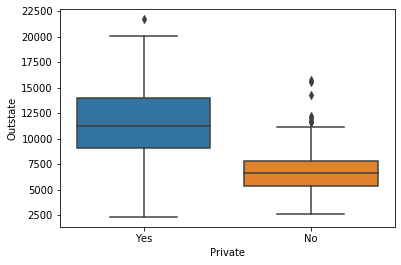

In [40]:
sns.boxplot(x='Private', y='Outstate', data=df)

### (c) iv. エリート校の抽出

In [43]:
def check_elite(percent):
    if percent > 50:
        return 'YES'
    else:
        return 'NO'

In [44]:
df['Elite'] = df['Top10perc'].apply(check_elite)

In [50]:
df['Elite'].head(3)

Abilene Christian University    NO
Adelphi University              NO
Adrian College                  NO
Name: Elite, dtype: object

In [48]:
df['Elite'].describe()

count     777
unique      2
top        NO
freq      699
Name: Elite, dtype: object

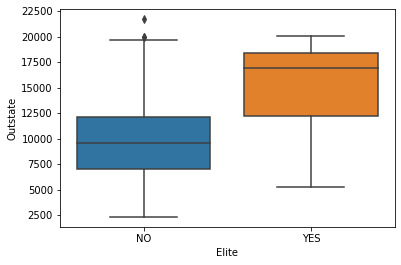

In [49]:
sns.boxplot(x='Elite', y='Outstate', data=df)

### (c) v. ヒストグラム作成

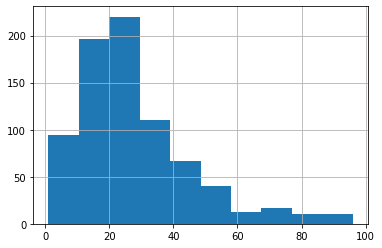

In [52]:
df['Top10perc'].hist()

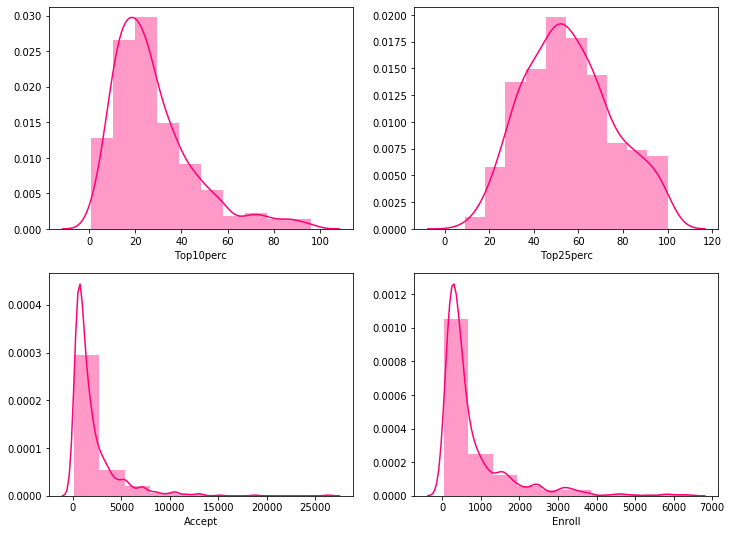

In [81]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

# kde=True: カーネル密度関数の描画
sns.distplot(df['Top10perc'], bins=10, color='#FF0077', label='data', kde=True,ax=ax[0,0])
sns.distplot(df['Top25perc'], bins=10, color='#FF0077', label='data', kde=True,ax=ax[0,1])
sns.distplot(df['Accept'], bins=10, color='#FF0077', label='data', kde=True,ax=ax[1,0])
sns.distplot(df['Enroll'], bins=10, color='#FF0077', label='data', kde=True,ax=ax[1,1])